# Technical Report and Data Analysis

#### Delete this Cell later
1. Introduction: Explain why you chose the topic, the questions you are interested in studying. List team members and a description of how each  contributed to the project.
2.   Description of data: Describe the dataset, how was it collect, how you accessed it, references/credit to source. 
3.   Analysis of the data:Provide a detailed, well-organized description of data quality, including the features, any data that should be cleaned or pre-processed before you EDA.
4.   Exploratory Data Analysis: Provide a detailed, well-organized description of your findings, including textual description, graphs, and code. Your focus should be on both the results and the process. Include, as reasonable and relevant, approaches that didn’t work, challenges, the data cleaning process, etc.
5.   Potential Data Science: Based on your data analysis and findings. Describe any potential ideas if you were to pursue a data science or machine learning project using this dataset. If you don’t find any potential, explain your rationale.
6.   Conclusion: Discuss limitations and future directions, lessons learned, maybe things you did not predict to find out or things you learned as you performed the analysis.

# Introduction:

This report is based on the dataset of the Google Play Store user trends which includes many data features that can potentially be further analyzed in this report. We chose this topic because we were interested in what apps users download and what different data is attached to them. In this day and age, many are attached to their devices making it very vital to know what trends lie within one of the biggest app stores in the world.

In this technical report of the Google Play Store User Trends dataset, we will be asking the questions:

**Data Analysis Questions for dataset**
   1. How does the number of installs change depending on the payment type of the app?
   2. How does the content rating affect the number of installs of the app? Would there be more installs for apps rated "Everyone" since it is open for anyone to download?
   3. Do certain categories have more paid apps vs free apps, such as education having lots of paid apps?
   4. Does the app category have any correlation with the app size?
   5. Does payment type correlate with good ratings? Are paid apps more likely to have good ratings then free apps?

#### List of Members:

**Azan Sikder:**
- Wrote the introduction of both the technical report and blog post report
- Worked with Olly to deliver the Analysis of the data and the Exploratory Data Analysis of the technical report
- Wrote the Potential Data Science section of the technical report
- Worked with Olly to deliver the Discussion section of the blog post report
- Oversaw, discussed, and revised teammates' work to help deliver both reports. 
**Olly Love:**
- Wrote the conclusion of both the technical report and blog post report
- Worked with Azan to deliver the Analysis of the data and the Exploratory Data Analysis of the technical report
- Wrote the Description of the Data on the technical report
- Worked with Azan to deliver the Discussion section of the blog post report
- Oversaw, discussed, and revised teammates' work to help deliver both reports.

**NOTE:** Our analysis initially had three members but unfortunately had been reduced to two members as the other has dropped the course. 

# Description of Data:
Our chosen dataset is titled Google Play Store Apps and can be accessed here: https://www.kaggle.com/lava18/google-play-store-apps.
This dataset gives information about the many apps available for download in the Google Play Store. Webscaping was used to collect the datasets information. Using list comprehension, map and filter functions, numpy, and pandas databases, we sifted through the data and put seperate attributes into different lists for easier access, to help analyze it.
# Description of Each Attribute
- App: Application name
- Category: Category the app belongs to
- Rating: Overall user rating of the app
- Reviews: Number of user reviews for the app
- Size: Size of the app in megabytes
- Installs: Number of user downloads/installs for the app
- Type: Paid or Free
- Price: Price of the app
- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to 


# Loading the Data

In [1]:
# Importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load in dataset
df = pd.read_csv("googleplaystore.csv")

# Analysis Of The Data:

### Data Quality

### Cleaning the Data

In [2]:
# Convert installs column into numbers to get approximate amount of installs
# to then do calculations on

# Get rid of + sign
df['Installs'] = df['Installs'].apply(lambda x: re.sub(r'\+', '', x))
# Remove comma
df['Installs'] = df['Installs'].apply(lambda x: re.sub(r',', '', x))
# Convert to int
df['Installs'] = df["Installs"].apply(lambda x: int(x))
# Size cleaning
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,03-Jul-18,2.8,4.0.3 and up


# Exploratory Data Analysis:
Questions about our data we want answered.
- How does the number of installs change depending on the payment type of the app? - azan do this because tutorial work
- How does the content rating affect the number of installs of the app? Would there be more installs for apps rated "Everyone" since it is open for anyone to download? - olly
- Do certain categories have more paid apps vs free apps, such as education having lots of paid apps? - olly
- Does the app category have any correlation with the app size? - olly
- Does payment type correlate with good ratings? Are paid apps more likely to have good ratings then free apps? - azan

### How does the number of installs change depending on the payment type of the app?

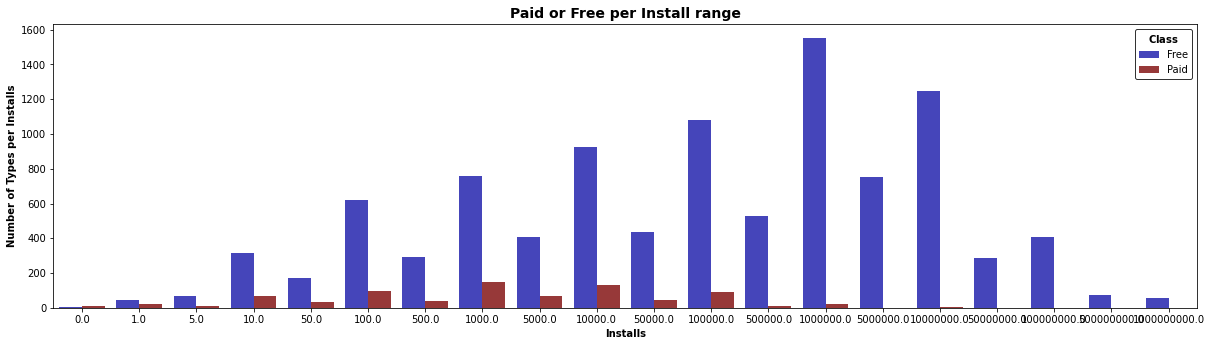

In [3]:
#azan
plt.figure(figsize = (17, 9))
plt.subplot(2, 1, (1))
c = sns.countplot(x = 'Installs', hue = df['Type'], data = df, palette = ['#3232CD','#A62A2A'])
leg = plt.legend(('Free', 'Paid'), loc = 'upper right', bbox_to_anchor = (1.0, 1.0), title = "$\\bf{Class}$")
leg.get_frame().set_edgecolor('k')
plt.title('Paid or Free per Install range', weight = 'bold', size = 14)
plt.xlabel('Installs', weight = 'bold', size = 10)
plt.ylabel('Number of Types per Installs', weight = 'bold', size = 10)
plt.tight_layout()

,Type,Installs
0,Free,1.675605e+11
1,Paid,7.295608e+07


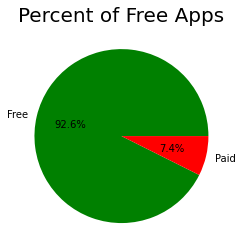

In [4]:
#Create table to display number of installs per type. Sum all installs to get a rough estimate
pvf_installs = df.groupby('Type')['Installs'].sum().reset_index()
#Begin constructing pie chart

#labels
labels =df['Type'].value_counts(sort = True).index
#size
sizes = df['Type'].value_counts(sort = True)
colors = ["green","red"]
explode = (0.0,0)  
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=360,)

plt.title('Percent of Free Apps',size = 20)
display(pvf_installs)
plt.show()

### How does the content rating affect the number of installs of the app? Would there be more installs for apps rated "Everyone" since it is open for anyone to download?

,Content Rating,Installs
0,Adults only 18+,2.000000e+06
1,Everyone,1.141567e+11
2,Everyone 10+,1.323388e+10
3,Mature 17+,5.524491e+09
4,Teen,3.471635e+10
5,Unrated,5.050000e+04


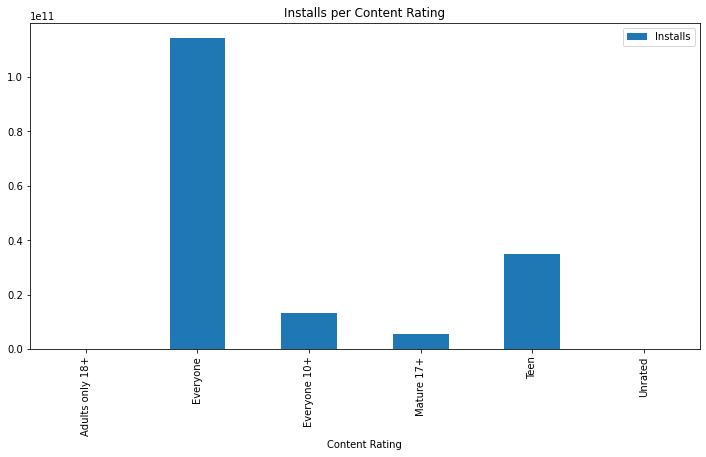

In [5]:
content_rating_installs = df[['Content Rating', 'Installs']].groupby(['Content Rating']).sum().reset_index()
content_rating_installs.plot(title="Installs per Content Rating", kind='bar', figsize=(12,6), x="Content Rating")
content_rating_installs

As you can see from the chart and data above the wider of an audience the content rating includes (general includes everyone, both adults and children, whereas adult only includes adults), it is more likely to get a lot of installs. Making an app that appeals to a wide range of people will lead to a wide range of people downloading it. There are over 114 trillion downloads for the content rating of Everyone compared to only 2 million downloads in the adult content rating.

When calculating data in the install category I had challenges due to the fact the values were strings and had commas and other characters that were irrelevant. I tried using list comprehension which failed but then I used regex along with the pandas apply function to remove the unwanted characters as well as converting the strings to integers for calculation.

### Do certain categories have more paid apps vs free apps, such as education having lots of paid apps?

In [6]:
#olly 

pvsf_category = df.groupby(['Category', 'Type']).size().reset_index()
pvsf_category

,Category,Type,0
0,ART_AND_DESIGN,Free,62
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,171
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,74


From the sample above we can see that generally every genre has more free apps then paid apps. Consumers must tend to be more likely to install free apps, so companies choose to make apps free over paid. There was some trouble grouping the data correctly, but then it was solved

### Does the app category have any correlation with the app size? 

In [7]:
df.head(10)
# Check sizes in art and design category
# do the same for maybe 2 others
# cities[['city', 'population']]
# df[["Category"]]
# make new column for if something is in art and design catego

def is_art_design(x):
    if x == "ART_AND_DESIGN":
        return 'true'
    else:
        return 'false'

df['In ART_AND_DESIGN'] = df['Category'].apply(is_art_design)
df.head(10)
#df[['In ART_AND_DESIGN', 'Size']]
# use boolean indexing 
df['In ART_AND_DESIGN'] == 'true'

frame = pd.DataFrame(df['In ART_AND_DESIGN'] if == 'true')

0         True
1         True
2         True
3         True
4         True
         ...  
10835    False
10836    False
10837    False
10838    False
10839    False
Name: In ART_AND_DESIGN, Length: 10840, dtype: bool

### Does payment type correlate with good ratings? Are paid apps more likely to have good ratings then free apps?

<AxesSubplot:xlabel='Rating', ylabel='0'>

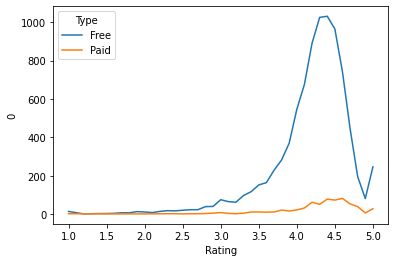

In [8]:
#azan
pvsf_rating = df.groupby(['Type', 'Rating']).size().reset_index()
sns.lineplot(data=pvsf_rating, x="Rating", y=0, hue="Type")


# Potential Data Science

Based on our data analysis and findings today we belive 

# Conclusion
olly

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0264070f-b165-4856-b142-ba0d75822d5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>